In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

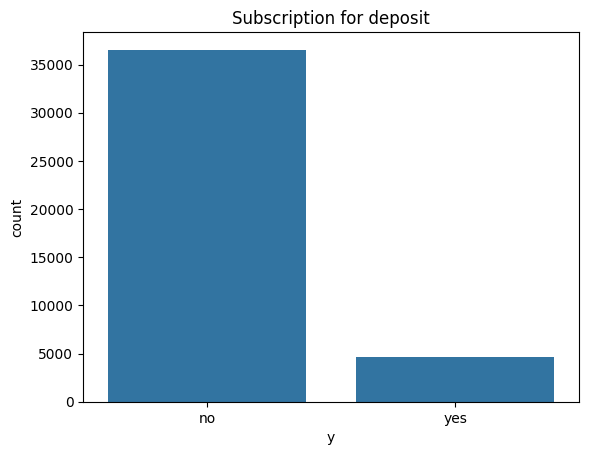

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

path_bank = '/content/drive/MyDrive/bank.csv'
df_bank = pd.read_csv(path_bank, delimiter=';')
df_bank.head()
df_bank.info()
df_bank.isnull().sum()
sns.countplot(x='y', data=df_bank)
plt.title("Subscription for deposit")
plt.show()

In [3]:
df_bank = pd.get_dummies(df_bank, drop_first = True)

X = df_bank.drop('y_yes', axis=1)
y = df_bank['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialise
lg = LogisticRegression(max_iter = 1000)
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Train
lg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

#Prediction
lg_pred = lg.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)

#Evaluate
print("Logistic Regression:")
print(classification_report(y_test, lg_pred))
print("Random Forest:")
print(classification_report(y_test, rf_pred))

Logistic Regression:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Random Forest:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7303
        True       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238



Confusion Matrix

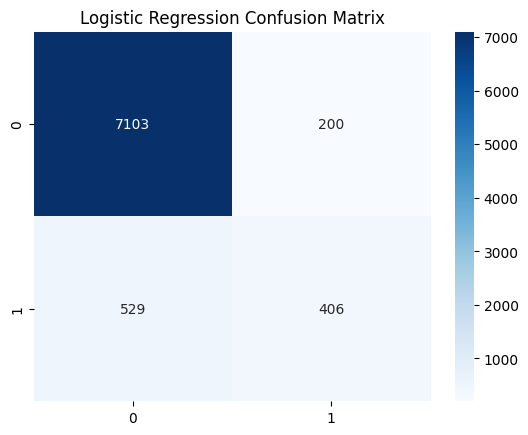

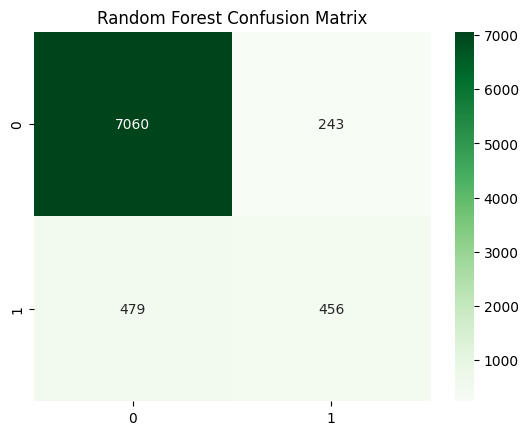

Logistic Regression Accuracy:  0.9115076474872542
Random Forest Accuracy:  0.9123573682932751


In [4]:
#Confusion Matrix
lg_cm = confusion_matrix(y_test, lg_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lg_cm, annot=True, fmt="d", cmap="Blues")
plt.show()

plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.show()

print("Logistic Regression Accuracy: ", accuracy_score(y_test, lg_pred))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_pred))

Accuracy Score

In [ ]:
param_grids = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20,30],
    'min_samples_split' : [2,5,10]
}

#Grid Search for Random Forest
grid_search = GridSearchCV(rf, param_grid=param_grids, cv=5, scoring = 'accuracy')
grid_search.fit(X_train_scaled, y_train)



In [ ]:
#Best Parameter
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_ )

#Final Model
final = grid_search.best_estimator_

#Prediction
final_pred = final.predict(X_test_scaled)

#Evaluate
print("Final Model classification Report:")
print(classification_report(y_test, final_pred))